# Personality analysis of entrepreneurs and artists
This notebook contains the personality analysis of artists and entrepreneurs to find the similarities in their big five personalities.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import json
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.style.use('ggplot')

## Data loading and preprocessing

We load and preprocess the data to get top 100 entrepreneur and artist speakers and their corresponding concatenated quotes. 
For personality analysis of entrepreneurs and artists, we start with retieving all the speaker details from the parquet files and selecting all the speakers with occupation as an artist or an enrepreneur.

In [2]:
speakers = pd.read_parquet('data/speaker_attributes.parquet')

In [3]:
speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [4]:
ENTREPRENEUR_QID = 'Q131524'
ARTIST_QID = 'Q483501'
artist_speakers = speakers[speakers.occupation.apply(lambda g: ARTIST_QID in g if g is not None else False)]
entrepreneur_speakers = speakers[speakers.occupation.apply(lambda g: ENTREPRENEUR_QID in g if g is not None else False)]

We have a precreated file that has a dictionary of the significant quote counts for all the speakers. Let's load that.

In [7]:
# extracting count of significant quotes for all the speakers in quotebank
with open('data/signi-quote-count-combined_1636253317430.json') as f:
    signi_quote_count_dict = json.load(f)

In [108]:
len(signi_quote_count_dict)

624492

In [109]:
signi_quote_count_df = pd.Series(signi_quote_count_dict, name='signi_quote_count')

Let's arrange all the artisits and entrepreneurs according to the significant quote count and select top 100 speakers with most number of quotes

In [10]:
signi_entrepreneur_speakers = entrepreneur_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_entrepreneur_speakers = signi_entrepreneur_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:100]

In [11]:
signi_artist_speakers = artist_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_artist_speakers = signi_artist_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:100]

In [12]:
signi_entrepreneur_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293
7938171,"[Elon Reeve Musk, Elon R. Musk, Elon R Musk]",[+1971-06-28T00:00:00Z],"[Q258, Q16, Q30]",[Q6581097],1395054202,None,None,"[Q15895020, Q205375, Q5482740, Q81096, Q131524...",None,None,Q317521,Elon Musk,None,item,[Q288928],21644
4560262,[Malcolm Bligh Turnbull],[+1954-10-24T00:00:00Z],[Q408],[Q6581097],1388042865,None,None,"[Q1930187, Q82955, Q131524, Q40348, Q2883465]",[Q241149],None,Q927550,Malcolm Turnbull,None,item,[Q1841],17720
4529756,"[Mark Elliott Zuckerberg, Zuck, Zuckerberg, Ma...",[+1984-05-14T00:00:00Z],[Q30],[Q6581097],1391311625,[Q7325],None,"[Q5482740, Q131524, Q82594, Q15472169, Q484876]",None,None,Q36215,Mark Zuckerberg,None,item,"[Q7066, Q9268]",16025
1142938,"[Kim Kardashian West, KiKi, Keeks, Kim K, Kimb...",[+1980-10-21T00:00:00Z],[Q30],[Q6581072],1395690668,"[Q2325516, Q1058496, Q1344183, Q1075293, Q3476...",None,"[Q3501317, Q512314, Q4610556, Q8246794, Q13152...",[Q29552],None,Q186304,Kim Kardashian,None,item,[Q5043],10875


In [13]:
signi_artist_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
4529456,"[Kanye Omari West, Yeezy, Ye, Yeezus, The Fly ...",[+1977-06-08T00:00:00Z],[Q30],[Q6581097],1393795449,[Q49085],None,"[Q177220, Q2526255, Q8246794, Q2252262, Q43845...",[Q327591],[Q11415564],Q15935,Kanye West,None,item,[Q106039],7131
2514470,[Stephen Miller],[+1951-10-12T00:00:00Z],[Q30],[Q6581097],1382051740,None,None,"[Q1028181, Q483501]",None,None,Q11894443,Steve Miller,None,item,None,4378
4536293,"[Onika Maraj, Onika Tanya Maraj, Onika Tanya M...",[+1982-12-08T00:00:00Z],"[Q754, Q30]",[Q6581072],1395776598,"[Q49085, Q6025447]",None,"[Q36834, Q33999, Q177220, Q2405480, Q131524, Q...",None,None,Q162202,Nicki Minaj,None,item,[Q5043],4150
5942884,[Joshua Smith],[+1976-01-01T00:00:00Z],[Q30],[Q6581097],1395434231,None,None,"[Q1028181, Q483501, Q644687]",None,None,Q15454606,Josh Smith,None,item,None,2490
4811454,None,[+1972-01-01T00:00:00Z],[Q30],[Q6581097],1353759363,None,None,"[Q266569, Q483501]",None,None,Q15459993,Patrick Smith,None,item,None,1732


Now, let's load the quotes of the top hundred entrepreneurs from quotebank dataset from 2015 to 2020

In [39]:
# retrieves the quotes for the significant top hundred speakers
from functools import partial
years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_entrepreneur_speakers.id.to_list()
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/entrepreneur-speaker-quotes', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_entrepreneur_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

Processing year 2019: 3397it [17:09,  3.30it/s]



File data/quotebank/quotes-2019.json.bz2 processed in 1029.7s



Processing year 2020: 793it [04:01,  3.28it/s]


File data/quotebank/quotes-2020.json.bz2 processed in 241.6s



Output file names:
data/entrepreneur-speaker-quotes-2019_1639068384882.json
data/entrepreneur-speaker-quotes-2020_1639068626708.json


Let's load the quotes of the top hundred artist from quotebank dataset from 2015 to 2020

In [ ]:
# retrieves the quotes for the significant top hundred speakers
from functools import partial
years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_artist_speakers.id.to_list()
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/entrepreneur-speaker-quotes', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_artist_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

In [112]:
output_entrepreneur_list = ['data/entrepreneur-speaker-quotes-2015_1639058393619.json', 'data/entrepreneur-speaker-quotes-2016_1639059086240.json', 'data/entrepreneur-speaker-quotes-2017_1639060611970.json', 'data/entrepreneur-speaker-quotes-2018_1639061980207.json', 'data/entrepreneur-speaker-quotes-2019_1639068384882.json', 'data/entrepreneur-speaker-quotes-2020_1639068626708.json']

In [113]:
output_artist_list = ['data/artist-speaker-quotes-2015_1639415942261.json', 'data/artist-speaker-quotes-2016_1639416599406.json', 'data/artist-speaker-quotes-2017_1639418039284.json', 'data/artist-speaker-quotes-2018_1639419423996.json', 'data/artist-speaker-quotes-2019_1639420451907.json', 'data/artist-speaker-quotes-2020_1639420690642.json']

Let's combine the quote files from 2015 to 2020

In [125]:
entrepreneur_combined = combine_quotes_files(output_entrepreneur_list)

In [126]:
artist_combined = combine_quotes_files(output_artist_list)

Let's filter out the unwanted quotes with garbage values

In [127]:
entrepreneur_quotes, filtered_quotes = filter_quotes(entrepreneur_combined)

In [128]:
filtered_quotes[:5]

[{'quotation': 'total and complete shutdown (http://www.marketwatch.com/story/trump-calls-for-complete-shutdown-of-muslims-entering-us-2015-12-07)',
  'proba': '0.8537'},
 {'quotation': 'The latest book on Hillary -- Wow, a really tough one! http://www.amazon.com/dp/151070678X\xa0 @RogerJStoneJr.',
  'proba': '0.8819'},
 {'quotation': "become president of the US ”.Net anyahu had on Wednesday confirmed he would meet the frontrunner for the Republican presidential nomination to succeed Barack Obama in the White House despite an international outcry... Recent related news World' Trump cancels Israel visit after uproar over his comments GOP presidential front-runner Donald Trump canceled plans Thursday to visit Israel, a trip for which even Prime Minister Benjamin Netanyahu -- widely seen as an... * By The Canadian Press * WASHINGTON -- The Associated Press has learned that Republican presidential candidate Donald Trump plans to visit the majority-Muslim... CJME 2 days ago-World You Might 

In [129]:
artist_quotes, filtered_quotes = filter_quotes(artist_combined)

In [130]:
filtered_quotes[:5]

[{'quotation': "In a corridor system, reserves in the banking system are scarce, and the Fed funds rate is set by adjusting the supply of reserves through open market operations to balance demand and supply at the FOMC's target range. In contrast, in a floor system, reserves are abundant, so that the interest rate the Fed pays on excess reserves, or IOER, is the primary tool used to control the federal funds rate. As Fed is trimming its balance sheet, the reserve is prone to be significantly lower than the level years ago. Some have raised that a return to channel system might be considered. Powell might comment on this area but we expect the Fed should maintain the current system for some time. Currently, how much the Fed would reduce its balance sheet (point 1) would also affect whether and when to adjust the system. Powell is unlikely offer more indications on the future rate hike path than what had been discussed in the June and August meetings. The Fed is set to raise the policy r

Let's concatenante all the quotes of each speaker

In [131]:
entrepreneur_quotes_concat = concatenate_quotes(entrepreneur_quotes)
artist_quotes_concat = concatenate_quotes(artist_quotes)

In [132]:
entrepreneur_quotes_df = pd.Series(entrepreneur_quotes_concat, name='quotations')
artist_quotes_df = pd.Series(artist_quotes_concat, name='quotations')

In [133]:
entrepreneur_quotes_df.head()

Q22686      Under what pretext did Israel's survival beco...
Q439729     Hurricane Irma is a major and life-threatenin...
Q11702      At the outset of these talks, the Obama admin...
Q887766     HBO is fortunate to have a lot of talented gu...
Q5284       You know, in the software world, in particula...
Name: quotations, dtype: object

In [134]:
artist_quotes_df.head()

Q229990      So another jump in time and history. Chris Ma...
Q8008048     Unlike virtually all other forms of credit, s...
Q449048      I started off as a live performer, so I suppo...
Q7153141     We're refreshing the Independent Festival Awa...
Q15935       We have a good -- and the thing is... let's s...
Name: quotations, dtype: object

Let's merge the 

In [29]:
entrepreneur_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_df, left_on='id', right_index=True, how='inner')
artist_df = signi_artist_speakers.merge(artist_quotes_df, left_on='id', right_index=True, how='inner')

In [31]:
entrepreneur_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes.csv', index=False)
artist_df[['id', 'quotations']].to_csv('data/artist_quotes.csv', index=False)

The above generated csv file will be used as input to the LIWC software to generate LIWC word category values for each speaker

In [2]:

entrepreneur_quotes_liwc = pd.read_csv('data/entrepreneurs_liwc.csv')
artist_quotes_liwc = pd.read_csv('data/artists_liwc.csv')

In [3]:
entrepreneur_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q22686,Under what pretext did Israel's survival beco...,804,25.12,29.60,60.45,3.86,0.00,0.50,0.50,...,3.23,0.00,0.0,0.50,0.00,1.87,0.0,1.00,0.00,0.12
1,Q317521,"Earlier today, I announced that I'm consideri...",894,15.41,21.03,62.64,5.59,0.78,2.13,2.91,...,7.27,0.11,0.0,0.00,0.00,2.46,0.0,2.24,0.22,0.56
2,Q927550,This is a guy who goes out to work sites and ...,874,19.00,20.14,71.85,9.38,0.92,1.72,2.63,...,5.49,0.11,0.0,0.11,0.00,2.06,0.0,3.09,0.23,0.69
3,Q36215,I spent today in Delaware discussing emergenc...,852,18.13,22.65,68.90,10.09,1.64,4.69,6.34,...,3.05,0.12,0.0,0.00,0.00,2.23,0.0,2.11,0.23,0.23
4,Q186304,"Hey, guys. I wanted to write a post elaborati...",915,16.34,18.14,73.77,13.88,7.32,0.66,7.98,...,3.83,1.09,0.0,0.33,0.22,1.97,0.0,1.97,0.44,0.66


In [4]:
artist_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q15935,We have a good -- and the thing is... let's s...,940,14.03,15.11,76.91,13.30,4.57,3.51,8.09,...,5.64,0.0,0.32,0.64,0.32,1.28,0.0,5.00,0.0,1.70
1,Q11894443,"help, my family needs rescue right now, so - ...",880,20.47,18.07,66.25,8.75,2.27,1.93,4.20,...,5.11,0.8,0.00,0.23,0.00,10.91,0.0,3.07,0.0,0.45
2,Q162202,When someone says how they feel they're not a...,987,14.10,9.52,81.76,17.53,9.22,0.81,10.03,...,5.47,0.0,0.00,0.30,0.00,1.11,0.0,6.99,0.0,1.93
3,Q15454606,It is worth remembering that the millions of ...,929,20.20,16.04,75.24,11.73,3.12,2.37,5.49,...,4.20,0.0,0.11,0.11,0.32,0.54,0.0,1.94,0.0,0.11
4,Q15459993,We promise this year's Berkeley Heights Stree...,897,25.63,18.95,69.57,10.93,1.23,3.68,4.91,...,5.80,0.0,0.22,0.11,0.22,0.11,0.0,3.68,0.0,0.89


We use predict_personality function to get the LIWC personality values for each speaker. This function computes personality scores based on the LIWC features. It essentially multiplies the matrix of normalized LIWC features with the matrix of correlations between LIWC and Big-Five personality types.

In [5]:
entrepreneur_personality = predict_personality(entrepreneur_quotes_liwc)
artist_personality = predict_personality(artist_quotes_liwc)

Since the each personality type values are of different range, we need to standardize it.

In [6]:
personality_append = entrepreneur_personality.append(artist_personality)

In [7]:
personality_append_norm = (personality_append - personality_append.mean())/personality_append.std()

In [8]:
entrepreneur_personality_norm = personality_append_norm[:100]
artist_personality_norm = personality_append_norm[100:]

To agregate the personality values for all the speakers, let's take the median accross personality types for both entrepreneurs and artists

In [9]:
overall_entrepreneur_personality = entrepreneur_personality_norm.median(axis=0)
overall_artist_personality = artist_personality_norm.median(axis=0)

In [10]:
overall_personality = pd.DataFrame([overall_entrepreneur_personality, overall_artist_personality], index=['Entrepreneur', 'Artist'])

In [11]:
overall_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
Entrepreneur,-0.161089,0.020382,-0.125862,0.101123,-0.030575,-0.043005,-0.165429,0.066137,-0.163148,0.118551,...,-0.217580,0.069731,-0.036894,-0.027622,-0.158546,0.029966,0.004920,-0.058610,-0.116828,-0.104364
Artist,0.049351,-0.154439,0.117111,0.082366,0.186375,-0.068750,-0.073763,0.080431,0.034984,0.012250,...,-0.164761,-0.293342,0.056455,-0.134870,-0.038409,-0.088513,0.039683,-0.122039,-0.246958,-0.024127


<AxesSubplot:>

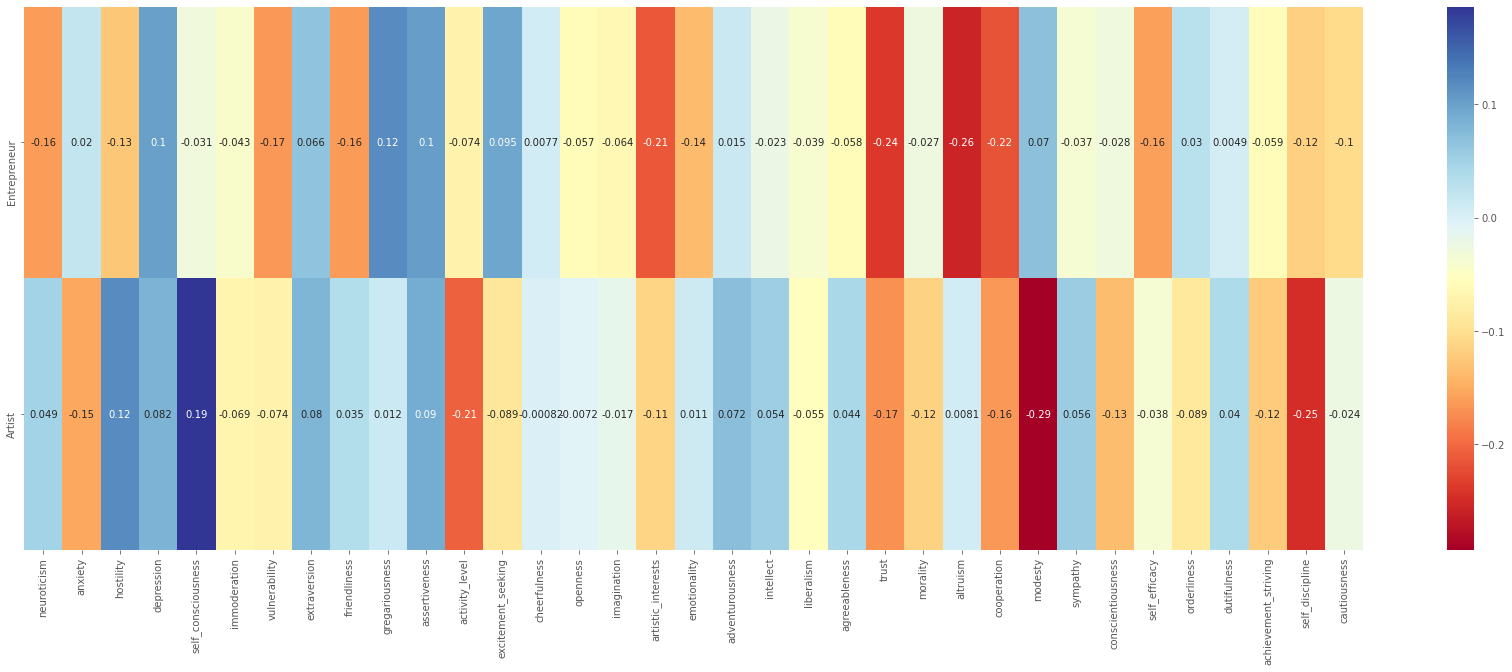

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(overall_personality, ax=ax, annot=True, cmap='RdYlBu')

Since these values varies differently, to truely understand how similar entrepreneurs and artists are let's plot the distribution of the their personality types

In [13]:
entrepreneur_personality_n = entrepreneur_personality_norm.copy()
artist_personality_n = artist_personality_norm.copy()
entrepreneur_personality_n['occupation'] = 'entrepreneur'
artist_personality_n['occupation'] = 'artist'
entrepreneur_artist_personality = pd.concat([entrepreneur_personality_n, artist_personality_n]).reset_index()

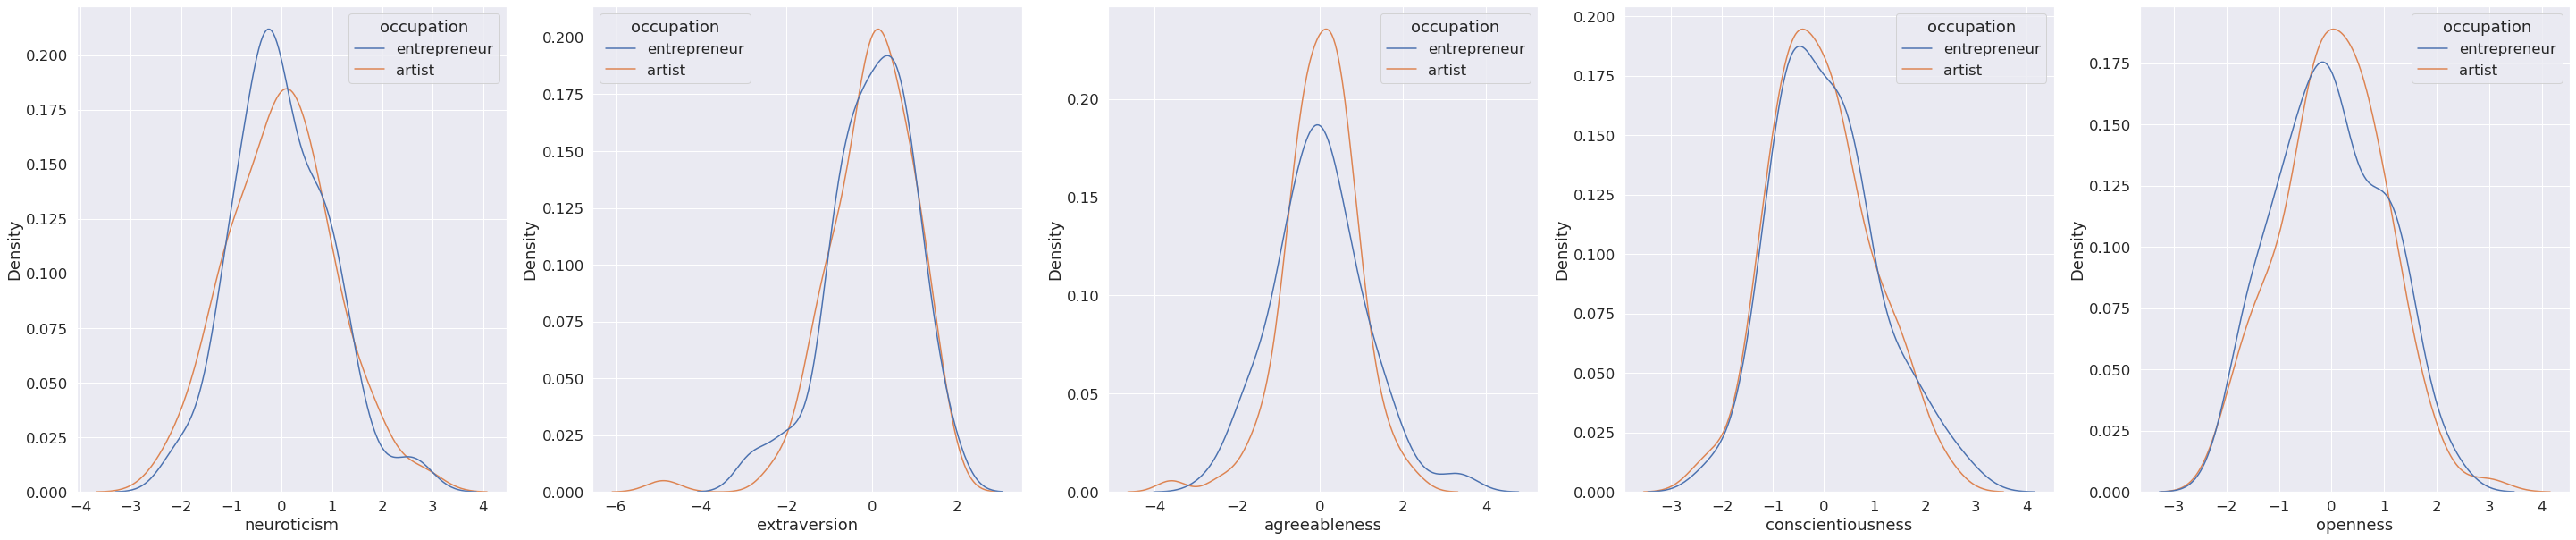

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(50, 10))
for i, attr in enumerate(['neuroticism', 'extraversion', 'agreeableness', 'conscientiousness', 'openness']):
    sns.set(font_scale = 1.5)
    sns.kdeplot(data=entrepreneur_artist_personality, x=attr, hue='occupation', ax=axes[i])

The similarity in the distribution of big five personality values for artists and entrepreneurs show that artists and entrepreneurs are similar. However, let's check if the similarity hypothesis is signifincant.

In [23]:
for per in ['neuroticism', 'extraversion', 'agreeableness', 'conscientiousness', 'openness']:
    res = stats.ttest_ind(entrepreneur_personality_norm[per], artist_personality_norm[per])
    print(f'P value for {per}: {res[1]}')

P value for neuroticism: 0.9530794532932345
P value for extraversion: 0.9854531053697491
P value for agreeableness: 0.7727169450769584
P value for conscientiousness: 0.49293038202461803
P value for openness: 0.7214078159177895


The signifince test shows that the personality values for artists and entrepreneurs are similar.

The research also shows that Artists score higher in emotionality and agreeableness at the same time entrepreneurs score higher in self-efficasy and extraversion. Our analysis agrees with the research in emotionality and agreeableness values. However, it also shows that artists again scores higher in self-efficasy and extraversion. To check the significance of these values, we did hypothesis testing on them. 

In [24]:
for per in ['emotionality', 'extraversion', 'self_efficacy', 'agreeableness']:
    res = stats.ttest_ind(entrepreneur_personality_norm[per], artist_personality_norm[per])
    print(f'P value for {per}: {res[1]}')

P value for emotionality: 0.5096274934266474
P value for extraversion: 0.9854531053697491
P value for self_efficacy: 0.7668010126844118
P value for agreeableness: 0.7727169450769584


t test on theses values show that the difference is not significant. Which means that there is no significant difference in personality of artists and entrepreneurs.